# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-06-13 04:58:10 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
import Pkg; Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed GR_jll ─────────────────────── v0.72.7+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Measures ───────────────────── v0.3.2
   Installed Unitful ────────────────────── v1.14.0
   Installed Grisu ──────────────────────── v1.0.2
   Installed ConcurrentUtilities ────────── v2.2.0
   Installed Formatting ─────────────────── v0.4.2
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Plo

In [ ]:
using Plots
using Random

# Variational MC for liquid helium 4

## module for liquid helium 4

In [ ]:
module Helium4

# physical constant
    hbar = 1.054571e-34 # kg m^2 / s
    kB = 1.380649e-23 # J / K
  # mass of helium 4 atom
    massHe4 = 4.00260325415 * 1.0e-3 / 6.022140e+23 # kg
    mass = kB * massHe4 * 1.0e-20 / hbar^2 # K^-1 angstrom^-2
  # parameters for Lenard-Jones 6-12 potential
    epsLJ = 1.41102e-22 / kB # K
    sigmaLJ = 2.556 # angstrom

# parameters and valuables
    mutable struct Param
        a1::Float64
        a2::Float64
        L::Float64
        N::Int
        rcut::Float64
        config::Array{Float64,2} # (3,N)
        dist::Array{Float64,2} #  (N,N)
        Param() = new()
    end

# initialization
    function initialize(param::Param, a1, a2, L, N)
        param.a1 = a1
        param.a2 = a2
        param.L = L
        param.N = N
        param.rcut = 0.5*a1
        param.config = zeros(Float64,3,N) # column-major
        param.dist = zeros(Float64,N,N) # column-major
        return 0
    end

    function initialize_config(param::Param)
        for j in 1:param.N
            for i in 1:3
                param.config[i,j] = param.L * rand(Float64)
            end
        end
        for iupdate in 1:param.N
            update_dist(param, iupdate)
        end
    end

# update the configuration of the atoms
    function update_config(param::Param, iupdate)
        d = 0.05*param.L
        for i in 1:3
            param.config[i,iupdate] += 2.0*d*(rand(Float64)-0.5)
            param.config[i,iupdate] = mod(param.config[i,iupdate], param.L)
        end
    end

    function update_dist(param::Param, iupdate)
        for i in 1:param.N
            tmp_dist = dist_periodic(param,param.config[:,i],param.config[:,iupdate])
            if tmp_dist > param.rcut
                param.dist[i,iupdate] = tmp_dist
                param.dist[iupdate,i] = tmp_dist
            else
                param.dist[i,iupdate] = param.rcut
                param.dist[iupdate,i] = param.rcut
            end
        end
    end

    function dist_periodic(param::Param, r1, r2)
        dist_old = sqrt(3.0)*param.L
        for iz in -1:1
            for iy in -1:1
                for ix in -1:1
                    tmp_dist = 0.0
                    tmp_dist += (param.L*ix + r1[1] - r2[1])^2
                    tmp_dist += (param.L*iy + r1[2] - r2[2])^2
                    tmp_dist += (param.L*iz + r1[3] - r2[3])^2
                    tmp_dist = sqrt(tmp_dist)
                    if tmp_dist < dist_old
                        dist_old = tmp_dist
                    end
                end
            end
        end
        return dist_old
    end

# Jastrow factor
    function func_u(param::Param, r::Float64)
        uofr = 0.0
        if r > param.rcut
            uofr = (param.a1/r)^param.a2
        else
            uofr = (param.a1/param.rcut)^param.a2
        end
        return uofr
    end

# radial two-point distribution function
    function accum_Nrdr(param::Param, Ndr, Nrdr)
        rmax = 0.5*param.L
        dr = rmax/Ndr
        for m in 1:Ndr
            r = rmax*(m-0.5)/Ndr
            for j in 1:(param.N-1)
                for i in (j+1):param.N
                    if (param.dist[i,j] >= r - 0.5*dr) && (param.dist[i,j] < r + 0.5*dr)
                        Nrdr[m] += 1.0
                    end
                end
            end
        end
    end

    function calc_gofr(param::Param, Nsample, Ndr, Nrdr, gofr, vecr)
        Ω = param.L^3
        ρ = param.N*1.0 / Ω
        rmax = 0.5*param.L
        dr = rmax/Ndr
        for m in 1:Ndr
            r = rmax*(m-0.5)/Ndr
            vecr[m] = r
            gofr[m] = Nrdr[m]/(2.0*Nsample*π*(ρ^2)*Ω*(r^2)*dr)
        end
    end

end

Main.Helium4

set parameters

In [ ]:
using .Helium4

a1 = 2.6 # variational parameter
a2 = 5.0 # variational parameter
L = 11.2　# linear length of the cubic cell (periodic boundary condition) (ang)
N = 32 # number of atoms in the cubic cell

param = Helium4.Param()
Helium4.initialize(param, a1, a2, L, N)
Helium4.initialize_config(param)

In [ ]:
Nwup = 3200 # number of warming up steps
Nsample = 12800 # number of MC samples
Random.seed!(10) # set a seed for the psuedo random number generator
# preparation for the radial two-point distribution function
Ndr = 64
Nrdr = zeros(Float64, Ndr)
gofr = zeros(Float64, Ndr)
vecr = zeros(Float64, Ndr)

64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## Warming up

In [ ]:
# warming up
config_old = zeros(Float64, 3, param.N)
dist_old = zeros(Float64, param.N, param.N)
for i in 1:Nwup
    for j in 1:param.N
        config_old .= param.config
        dist_old .= param.dist
        iupdate = Int(floor(rand(Float64)*param.N)) + 1
        if iupdate > param.N
            println("error!", iupdate)
        end
        Helium4.update_config(param,iupdate)
        Helium4.update_dist(param,iupdate)
        lnPNt = 0.0
        lnPNi = 0.0
        for m in 1:param.N
            if m ≠ iupdate
                lnPNt -= 2.0*Helium4.func_u(param,param.dist[m,iupdate])
                lnPNi -= 2.0*Helium4.func_u(param,dist_old[m,iupdate])
                if (param.dist[m,iupdate]- dist_old[m,iupdate]) == 0.0
                   println("dist is not")
                end
            end
        end
        ratio = exp(lnPNt - lnPNi)
        if ratio <= rand(Float64)
            param.config[:,:] = config_old[:,:]
            param.dist[:,:] = dist_old[:,:]
        end
    end
    if i % 100 == 0
        println("Wup",i," ",param.config[1,1])
    end
end

dist is not
dist is not
dist is not
dist is not
Wup100 6.97840941861197
Wup200 4.781040361676252
Wup300 6.123503454442685
Wup400 5.807830768300094
Wup500 6.917145772341952
Wup600 9.946835687635716
Wup700 8.613682178188968
Wup800 11.189845642279948
Wup900 0.17355816487880915
Wup1000 10.197080122695668
Wup1100 8.538257323789365
Wup1200 8.576276265389376
Wup1300 9.955068292348527
Wup1400 8.098577163219076
Wup1500 7.119892342105694
Wup1600 1.3501970264386247
Wup1700 4.459099385581917
Wup1800 5.0169012911475095
Wup1900 3.545112191530399
Wup2000 3.4466613654854785
Wup2100 2.086005488517727
Wup2200 10.845142916960276
Wup2300 0.11006881491819698
Wup2400 10.084316229566818
Wup2500 7.563910477778923
Wup2600 9.963612280289876
Wup2700 10.248749961216616
Wup2800 8.754898236075777
Wup2900 0.6563205811777567
Wup3000 3.4169849989718304
Wup3100 2.505580066878083
Wup3200 0.6375711436566697


## MC sampling

In [ ]:
for i in 1:Nsample
    for j in 1:param.N
        config_old .= param.config
        dist_old .= param.dist
        iupdate = Int(floor(rand(Float64)*param.N)) + 1
        Helium4.update_config(param,iupdate)
        Helium4.update_dist(param,iupdate)
        lnPNt = 0.0
        lnPNi = 0.0
        for m in 1:param.N
            if m ≠ iupdate
                lnPNt -= 2.0*Helium4.func_u(param,param.dist[m,iupdate])
                lnPNi -= 2.0*Helium4.func_u(param,dist_old[m,iupdate])
            end
        end
        ratio = exp(lnPNt - lnPNi)
        if ratio <= rand(Float64)
            param.config[:,:] = config_old[:,:]
            param.dist[:,:] = dist_old[:,:]
        end
    end
    if i % 100 == 0
        println("MCstep",i," ",param.config[1,1])
    end
    Helium4.accum_Nrdr(param,Ndr,Nrdr)
end
Helium4.calc_gofr(param,Nsample,Ndr,Nrdr,gofr,vecr)

MCstep100 9.66044422760767
MCstep200 7.98155364853574
MCstep300 8.564178881402905
MCstep400 4.2723697898757615
MCstep500 4.60421018625932
MCstep600 5.058966527262306
MCstep700 5.987158640503935
MCstep800 8.394199257649655
MCstep900 8.439152834230214
MCstep1000 9.289482407676525
MCstep1100 10.48702348842561
MCstep1200 0.1599964157752254
MCstep1300 10.497799198879655
MCstep1400 0.5179756023127849
MCstep1500 0.08148202424999357
MCstep1600 0.8275528238139083
MCstep1700 9.752608663287473
MCstep1800 9.692945080778864
MCstep1900 1.1416626328531592
MCstep2000 10.039276807539983
MCstep2100 9.654313929004614
MCstep2200 1.5375381800597712
MCstep2300 9.474709508211927
MCstep2400 7.774906886174152
MCstep2500 7.368044558224589
MCstep2600 9.386833872069387
MCstep2700 10.829724129538263
MCstep2800 0.5353467395004774
MCstep2900 10.361683479529033
MCstep3000 2.2418064830283058
MCstep3100 0.7291364192443165
MCstep3200 0.3225333453281707
MCstep3300 1.2796106798067606
MCstep3400 1.4693314784982456
MCstep35

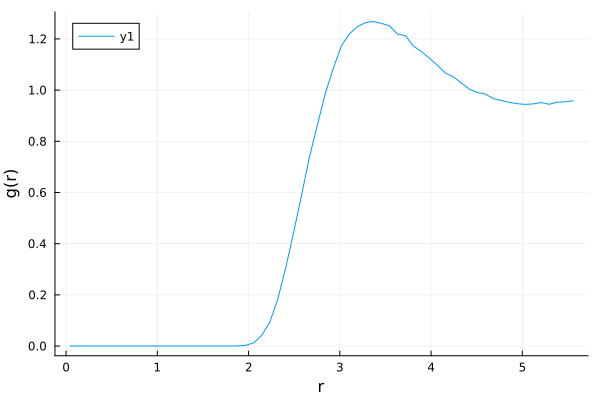

In [ ]:
plot(vecr,gofr,xlabel="r",ylabel="g(r)")